# Random number generation

In this section, we examine how to generate random numbers for various
probability distributions in NumPy.

## Random number generators

Currently, there are several ways to draw random numbers in Python:

1.  The [_new_ programming interface](https://numpy.org/doc/stable/reference/random/generator.html)
    implemented in NumPy, introduced
    in version 1.17 (the current version as of this writing
    is 2.2).
2.  The [_legacy_ programming interface](https://numpy.org/doc/stable/reference/random/legacy.html)
    implemented in NumPy.

    While these functions have been superseded by the new implementation,
    they continue to work.
    If you are familiar with the legacy interface, you can read about
    what has changed in the new interface [here](https://numpy.org/doc/stable/reference/random/new-or-different.html).

3.  The Python standard library itself also includes random number generators
    in the [`random`](https://docs.python.org/3/library/random.html#random.random) module.

    We won't be using this implementation at all,
    since for our purposes `numpy.random` is preferable
    as it supports NumPy arrays.

The programming interface for generating random numbers in NumPy
changed substantially in release 1.17.
We discuss the new interface in this unit since it offers
several advantages, including faster algorithms for some distributions.
Moreover, one would expect the legacy interface to be
removed at some point in the future.
However, many examples you will find in textbooks and on the internet
are likely to use the old variant.

**A note on random number generation**

Computers usually cannot draw
truly random numbers, so we often talk about _pseudo-random number
generators_ (PRNG). They are drawn form an deterministic sequence. Given an initial seed, these PRNGs will always produce
the same sequence of "random" numbers, at least if run using the
same software, the same underlying algorithm, etc.
For scientific purposes this is actually desirable as it allows us
to create reproducible results. For simplicity, we will nevertheless
be using the terms "random number" and "random number generator" (RNG),
omitting the "pseudo" prefix.


### Simple random data generation

Before we can generate any random numbers using the new interface, we need
to obtain an RNG instance. We can get the default RNG by calling
[`default_rng()`](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
as follows:


In [2]:
# Import numpy random
import numpy.random

In [6]:
# import function that returns the default RNG
from numpy.random import default_rng

# get an instance of the default RNG
rng = default_rng()

print(rng.random(1))  # prints a random float in [0, 1)

[0.93427701]


**Drawing random floats**

Let's begin with the simplest case, which uses the [`random()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html)
function to draw numbers that are uniformly distributed
on the half-open interval $[0, 1)$.


In [7]:
from numpy.random import default_rng

rng = default_rng()  # obtain default RNG implementation

rng.random(5)  # return array of 5 random numbers

array([0.23286099, 0.53384265, 0.62332721, 0.35360297, 0.40490878])

Calling `random()` this way will return a different set of
numbers each time (this might, for example, depend on the system time).
To obtain the same draw each time, we can pass an initial _seed_ when
creating an instance of the RNG like this:


In [15]:
seed = 123  # The value of the seed do not matter, it can be any integer
# It is usefull if you want to reproduce the same random numbers
# in the future

rng = default_rng(seed)  # obtain default RNG implementation,

# initialize seed


rng.random(5)  # return array of 5 random numbers

array([0.68235186, 0.05382102, 0.22035987, 0.18437181, 0.1759059 ])

In [18]:
rng.random(5)  # return array of 5 random numbers

array([0.6299402 , 0.92740726, 0.23190819, 0.79912513, 0.51816504])

The `seed` argument needs to be an integer or an array of integers.
This way, each call gives the same numbers as can easily be illustrated
with a loop:


In [20]:
seed = 123
for i in range(5):

    rng = default_rng(seed)

    print(rng.random(5))

[0.97669977 0.38019574 0.92324623 0.26169242 0.31909706]
[0.97669977 0.38019574 0.92324623 0.26169242 0.31909706]
[0.97669977 0.38019574 0.92324623 0.26169242 0.31909706]
[0.97669977 0.38019574 0.92324623 0.26169242 0.31909706]
[0.97669977 0.38019574 0.92324623 0.26169242 0.31909706]


You can remove the `seed` to verify that the set of number will then differ
in each iteration.


**Drawing random integers**

Alternatively, we might want to draw random integers by calling
[`integers()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html), which returns numbers from a "discrete uniform"
distribution on a given interval:


In [28]:
rng = default_rng(seed=123)

rng.integers(2, size=5)  # vector of 5 integers from set {0, 1}
# here we specify only the (non-inclusive)
# upper bound 2

array([0, 1, 1, 0, 1])

Alternatively, we can specify the lower and upper bounds like this:


In [54]:
rng.integers(1, 10, size=5)  # specify lower and upper bound

array([4, 5, 6, 9, 1])

Following the usual convention in Python, the upper bound is
not included by default. We can change this by
additionally passing `endpoint=True`:


In [53]:
rng.integers(1, 10, size=5, endpoint=True)  # include upper bound

array([9, 5, 3, 6, 6])

We can create higher-order arrays by passing a list or tuple as the
`size` argument:


In [55]:
rng.random(size=(2, 5))  # Create 2x5 array of floats
# on [0.0, 1.0)

array([[0.48838383, 0.61014483, 0.74387911, 0.42983032, 0.30280213],
       [0.00589003, 0.75647897, 0.07757597, 0.48998804, 0.3043611 ]])

In [56]:
rng.integers(2, size=(2, 3, 4))  # Create 2x3x4 array of integers {0,1}

array([[[0, 1, 0, 1],
        [0, 0, 0, 1],
        [1, 0, 0, 1]],

       [[0, 1, 1, 1],
        [1, 0, 1, 0],
        [0, 0, 0, 0]]])

#### Legacy interface

For completeness, let's look at how you would accomplish the same using
the _legacy_ NumPy interface.

To draw floats on the unit interval, we use [`random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html):


In [10]:
from numpy.random import random_sample, randint, seed

# Set seed globally using legacy interface
seed(123)

# Draw random floats
random_sample(5)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

Random integers can be generated using [`randint()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html):


In [11]:
randint(2, size=5)  # draw random integers from {0,1}

array([1, 1, 0, 1, 0])

The legacy interface defines global functions `seed()`, `random_sample()`, etc.
within the `numpy.random` module, which are implicitly associated with
a global RNG object. This implicit association has been removed in the
new programming model and you now have to obtain an RNG instance explicitly,
for example by using the `default_rng()` function, as demonstrated above.


### Drawing random numbers from distributions

Often we want to draw random numbers from a specific distribution
such as the normal or log-normal distributions. The RNGs in `numpy.random`
support a multitude of distributions, including:

- [`binomial()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.binomial.html)
- [`exponential()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.exponential.html)
- [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html)
- [`lognormal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.lognormal.html)
- [`multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.multivariate_normal.html)
- [`uniform()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.uniform.html)
- [`standard_t()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html)

and many others. For a complete list, see the [official documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions).


_Example: Drawing from a normal distribution_

We can draw from the normal distribution with mean $\mu=1.0$ and standard deviation
$\sigma=0.5$ using [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) as follows:


In [67]:
from numpy.random import default_rng

# Get RNG instance with given seed
rng = default_rng(seed=123)

# location and scale parameters of Normal distribution
mu = 1.0
sigma = 0.5

# Draw 10 normal numbers;
# mean and std. are passed as loc and scale arguments
rng.normal(loc=mu, scale=sigma, size=10)

array([0.50543932, 0.81610667, 1.64396263, 1.09698721, 1.46011545,
       1.2885519 , 0.68176818, 1.27097611, 0.84170227, 0.83880544])

_Example: Drawing from a multivariate normal distribution_

To draw from the multivariate normal, we need to specify a vector
of means $\mathbf{\mu}$ and the variance-covariance matrix $\mathbf{\Sigma}$, which we set to

$$
\mathbf{\mu} = \begin{bmatrix} 0 \\ 1\end{bmatrix}, \qquad
\mathbf{\Sigma} =\begin{bmatrix} \sigma_1^2 & \rho \sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2\end{bmatrix}
$$

with $\sigma_1 = 0.5$, $\sigma_2 = 1.0$ and $\rho = 0.5$.
We call [`multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html)
to draw a sample:


In [68]:
import numpy as np
from numpy.random import default_rng

# Get RNG instance with given seed
rng = default_rng(123)

mu = np.array((0.0, 1.0))  # vector of means
sigma1 = 0.5  # Std. dev. of first dimension
sigma2 = 1.0  # Std. dev. of second dimension
rho = 0.5  # Correlation coefficient

# Compute covariance
cov = rho * sigma1 * sigma2

# Create variance-covariance (VCV) matrix
vcv = np.array([[sigma1**2.0, cov], [cov, sigma2**2.0]])

# Print the variance covariance matrix
vcv

array([[0.25, 0.25],
       [0.25, 1.  ]])

In [69]:
# Draw MVN random numbers:
# each row represents one sample draw.
rng.multivariate_normal(mean=mu, cov=vcv, size=10)

array([[-0.44424426,  0.06264099],
       [ 0.46459735,  2.25499666],
       [ 0.50717927,  1.84365041],
       [ 0.02526624,  0.30264359],
       [-0.22397535,  0.72473434],
       [-0.58053624,  1.28106799],
       [ 0.09014951,  2.26460055],
       [ 0.35510451,  1.97642901],
       [ 0.19674056,  2.6006256 ],
       [ 0.0412573 ,  0.64963054]])

In [74]:
# Draw MVN random numbers:
data = rng.multivariate_normal(mean=mu, cov=vcv, size=10)
print(data)

# Calcuate the sample mean
sample_mean = np.mean(data, axis=0)
print(f"Mean:{sample_mean}")

# Calculate the sample covariance matrix
sample_cov = np.cov(data, rowvar=False)
print(f"Covariance:{sample_cov}")

# Calculate the sample correlation matrix
sample_corr = np.corrcoef(data, rowvar=False)
print(f"Correlation:{sample_corr}")

[[ 0.50754368  0.2874145 ]
 [-0.6421205   0.87228863]
 [ 0.05934261  0.6773041 ]
 [ 0.83482284  0.49323613]
 [ 0.94888236  1.63964474]
 [-0.25708549  2.57965959]
 [-1.2037999   0.95512164]
 [ 0.25130421  0.22344077]
 [-0.50784003  0.24001247]
 [ 0.41262058  1.22848515]]
Mean:[0.04036704 0.91966077]
Covariance:[[ 0.47344344 -0.01661083]
 [-0.01661083  0.55108903]]
Correlation:[[ 1.        -0.0325197]
 [-0.0325197  1.       ]]


<div class="alert alert-info">
<h3> Your turn</h3>

Use the <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.uniform.html"><tt>uniform()</tt></a> function from NumPy to draw a sample of 10 uniformly distributed
numbers on the interval [-1, 1]. Use a seed of 456 for this exercise.

</div>


In [76]:
# Using the uniform() function from Numpy to draw a sample of 10 uniformly distributed numbers on the interval [-1, 1]. Use seed 456.
from numpy.random import default_rng

rng = default_rng(456)

data = rng.uniform(
    -1, 1, 10
)  # Low and high bounds are -1 and 1, respectively. 10 Numbers are drawn = Size.

print(data)

[-0.06065351 -0.1046894  -0.75188639  0.50969996  0.94597691 -0.83396041
 -0.39138361  0.59210537 -0.19781844  0.96518996]


In the next section, we'll study how we can visualize draws of random numbers using scatter plots and histograms.


# Plotting with Matplotlib

In this section, we study how to plot numerical data. Python itself does not have any built-in
plotting capabilities, so we will be using [`matplotlib`](https://matplotlib.org/) (MPL),
the most popular graphics library for Python.

- For details on a particular plotting function, see the
  [official documentation](https://matplotlib.org/stable/users/index.html).
- There is an official introductory [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
  which you can use along-side the material presented here.

In order to access the functions and objects from matplotlib, we
first need to import them. The general convention is to use the
namespace `plt` for this purpose:

```python
import matplotlib.pyplot as plt
```

Note that there is an additional high-level plotting library called
[seaborn](https://seaborn.pydata.org/) which builds on top of Matplotlib with a focus on providing
convenient functions to create statistical graphs.


---

## Line plots

One of the simplest plots we can generate using the
[`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
function is a line defined by a list of $y$-values.


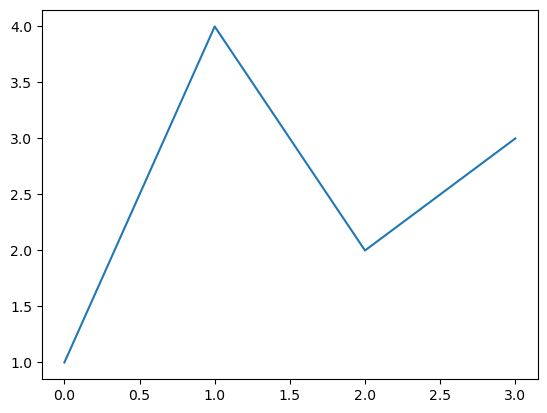

In [77]:
# import matplotlib library
import matplotlib.pyplot as plt

# Plot list of integers
yvalues = [1, 4, 2, 3]
plt.plot(yvalues)

We didn't even have to specify the corresponding $x$-values,
as MPL automatically assumes them to be [0, 1, 2, ...].
Usually, we want to plot for a given set of $x$-values like this:


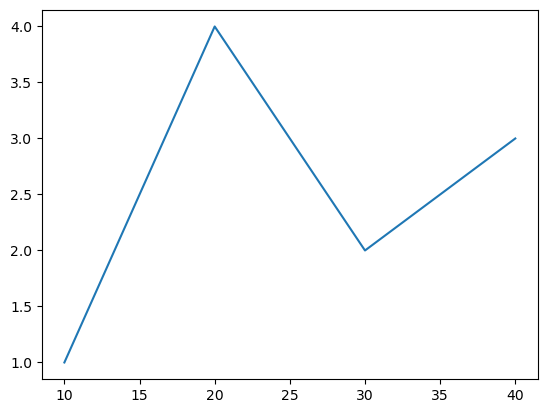

In [78]:
# explicitly specify x-values
xvalues = [10, 20, 30, 40]
plt.plot(xvalues, yvalues)

We can also specify multiple lines to be plotted in a single graph:


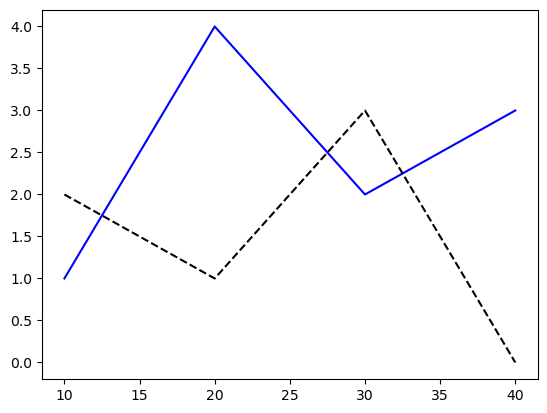

In [80]:
yvalues2 = [2.0, 1.0, 3.0, 0.0]
plt.plot(xvalues, yvalues, "b-", xvalues, yvalues2, "k--")

The characters following each set of $y$-values are style specifications.
The letters are short-hand notations for colors
(see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The remaining characters set the line styles. Valid values are

- `-` solid line
- `--` dashed line
- `-.` dash-dotted line
- `:` dotted line

Additionally, we can append marker symbols to the style specification.
The most frequently used ones are

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

The whole list of supported symbols can be found [here](https://matplotlib.org/stable/api/markers_api.html).


Instead of passing multiple values to be plotted at once,
we can also repeatedly call `plot()` to add additional elements to a graph.
This is more flexible since we can pass additional arguments which are
specific to one particular set of data, such as labels displayed in legends.


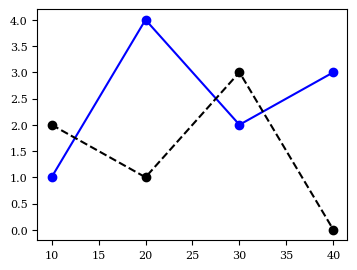

In [18]:
# Plot two lines by calling plot() twice
plt.plot(xvalues, yvalues, "b-o")
plt.plot(xvalues, yvalues2, "k--o")

Individual calls to `plot()` also allow us to specify styles
more explicitly using keyword arguments:


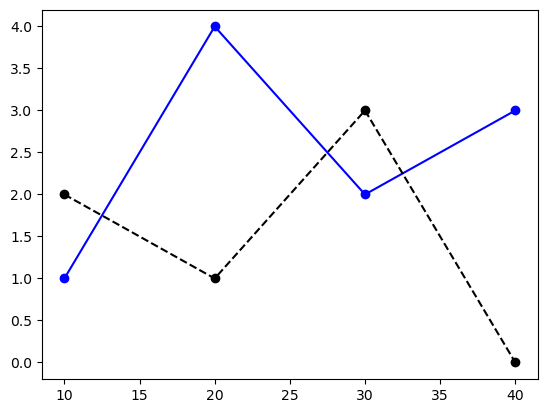

In [81]:
# pass plot styles as explicit keyword arguments
plt.plot(xvalues, yvalues, color="blue", linestyle="-", marker="o")
plt.plot(xvalues, yvalues2, c="black", ls="--", marker="o")

Note that in the example above, we use named colors such as `'red'` or `'blue'` (see
[here](https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors) for the complete list of named colors).


Matplotlib accepts abbreviations for the most common
style definitions using the following shortcuts:

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`
- `ms` or `markersize`

See the section on _Other Parameters_ in the [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
documentation for a complete list of arguments and their abbreviations.

We can write thus rewrite the above code as follows:


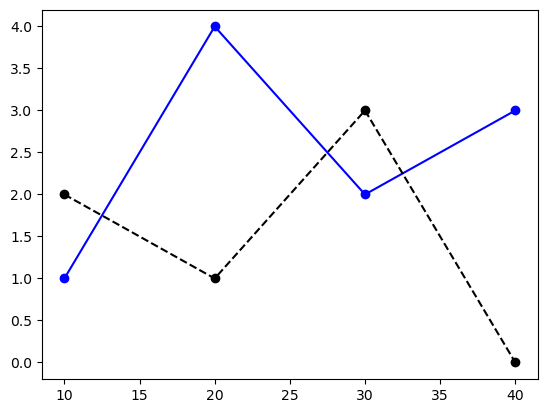

In [82]:
# abbreviate plot style keywords
plt.plot(xvalues, yvalues, c="blue", ls="-", marker="o")
plt.plot(xvalues, yvalues2, c="black", ls="--", marker="o")

<div class="alert alert-info">
<h3> Your turn</h3>
Consider the standard CRRA utility function given by u(c) = c<sup>1-γ</sup> / (1-γ).

Create a graph that shows function over the interval [0.1, 2] containing two lines for two distinct values of γ:

<ol>
    <li>γ = 1.1 using a blue dashed line with a line width of 0.5.</li>
    <li>γ = 2 using an orange line with line width of 0.75.</li>
</ol>
</div>


In [92]:
# CRRA Utility Function

import numpy as np


# Define the CRRA utility function
def utility(c, gamma):
    utility = c ** (1.0 - gamma) / (1.0 - gamma)
    return utility


# Create an array of consumption values [0.1, 2] with 100 points
c = np.linspace(0.1, 2, 100)

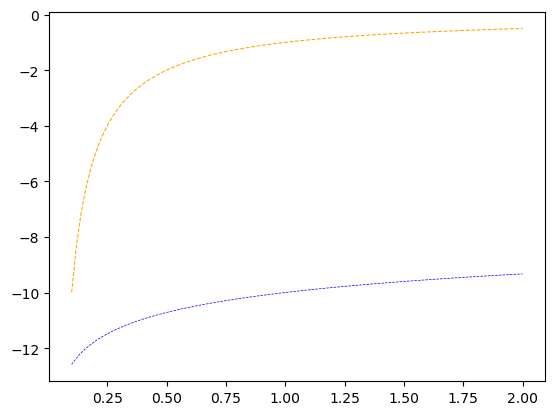

In [102]:
# Define the parameters of the CRRA utility function
gamma1 = 1.1
gamma2 = 2

# Compute the utility values for the two gamma values
u1 = utility(c, gamma1)
u2 = utility(c, gamma2)

# Plot the CRRA utility function
plt.plot(c, u1, c="blue", lw=0.5, ls="--")
plt.plot(c, u2, c="orange", lw=0.75, ls="--")

---

## Scatter plots


We use the [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
function to create scatter plots in a similar fashion to line plots:


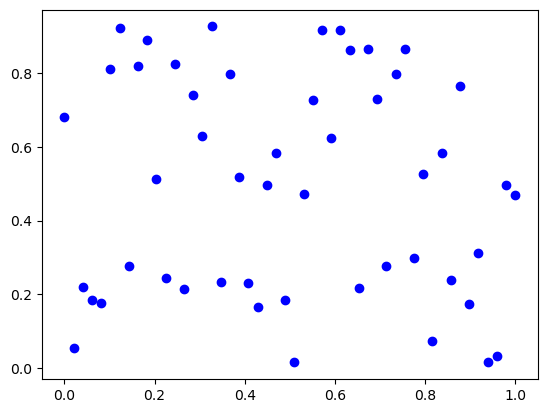

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Number of points
N = 50

# Create 50 uniformly-spaced values on the unit interval
xvalues = np.linspace(0.0, 1.0, N)
# Draw random numbers
yvalues = np.random.default_rng(123).random(N)

plt.scatter(xvalues, yvalues, color="blue")

We could in principle create scatter plots using `plot()` by turning
off the connecting lines. However, `scatter()` allows
us to specify the color and marker size as collections, so
we can vary these for every point. `plot()`, on the other hand, imposes
the same style on all points plotted in that particular function call.


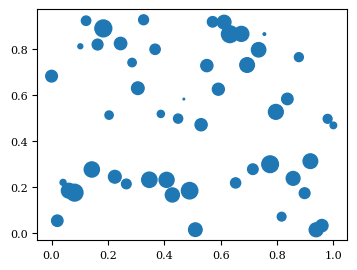

In [22]:
# Draw random marker sizes
size = (
    np.random.default_rng(456).random(N) * 150.0
)  # Draw random number from [0, 1) and scale by 150

# plot with point-specific marker sizes
plt.scatter(xvalues, yvalues, s=size)

<div class="alert alert-info">
<h3> Your turn</h3>

Recall the example on how to draw a sample from a multivariate normal distribution
covered in the previous section.

<ol>
    <li>Repeat the exercise, but now draw a sample of size 100.</li>
    <li>Visualize the first vs. the second dimension of this random sample as a scatter plot.</li>
</ol>
</div>


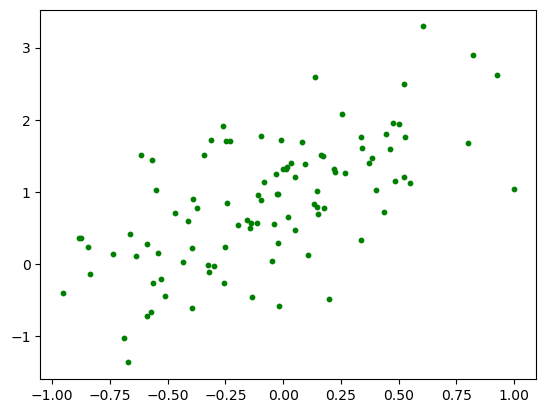

In [125]:
import numpy as np
from numpy.random import default_rng

# Get RNG instance with given seed
rng = default_rng(123)

mu = np.array((0.0, 1.0))  # vector of means
sigma1 = 0.5  # Std. dev. of first dimension
sigma2 = 1.0  # Std. dev. of second dimension
rho = 0.7  # Correlation coefficient

# Compute covariance
cov = rho * sigma1 * sigma2

# Create variance-covariance (VCV) matrix
vcv = np.array([[sigma1**2.0, cov], [cov, sigma2**2.0]])

# Create a sample of 100 multivariate normal random numbers
data = rng.multivariate_normal(mean=mu, cov=vcv, size=100)

# Visualize the first vs. the second dimension of this random sample as a scatter plot
xvalues = data[:, 0]  # data[:, 0] is the first column of the data array
yvalues = data[:, 1]  # data[:, 1] is the second column of the data array

plt.scatter(xvalues, yvalues, c="green", s=10)

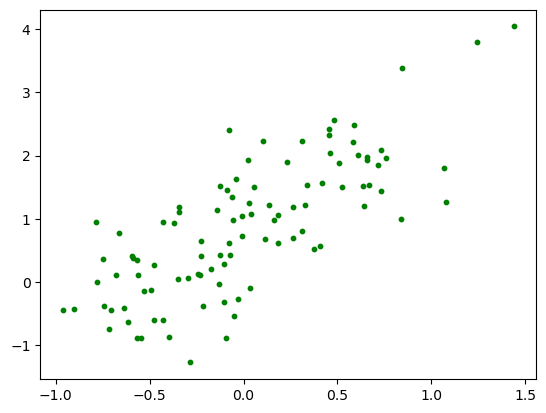

In [127]:
# Optional way
xvalues, yvalues = rng.multivariate_normal(
    mean=mu, cov=vcv, size=100
).T  # Have to transpose the array beacuse the scatter function expects two columns

plt.scatter(xvalues, yvalues, c="green", s=10)

In [ ]:
# Test the plot when you change the correlation coefficient!

---

## Histograms

We use the [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to create histograms which can be used to nonparametrically visualize the distribution of some sample data.

To illustrate, we revisit the random sample drawn from a normal distribution studied in the previous section
and visualize it using a histogram:


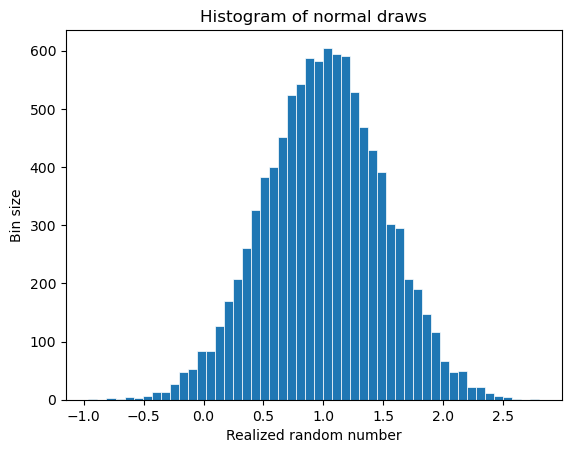

In [ ]:
from numpy.random import default_rng
import matplotlib.pyplot as plt

# Get RNG instance
rng = default_rng(123)

# location and scale parameters of normal distribution
mu = 1.0
sigma = 0.5

# Draw 10000 normal numbers;
# mean and std. are passed as loc and scale arguments
x = rng.normal(loc=mu, scale=sigma, size=10000)

# Plot the results as a histogram
_ = plt.hist(x, bins=50, linewidth=0.5, edgecolor="white")
_ = plt.xlabel("Realized random number")
_ = plt.ylabel("Bin size")
_ = plt.title("Histogram of normal draws")

# We use _ = plt.hist() to suppress the output of the function

# Bins is the number of intervals in the histogram (50 in this case)
# Each observation is assigned to one of the bins depending on its value
# If the value is in the interval of the bin, it is counted in the bin

---

## Plotting categorical data

Instead of numerical values on the $x$-axis, we can also plot categorical
variables using the function [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

For example, assume we have four categories and each has an associated
numerical value:


Text(0, 0.5, 'In thousand')

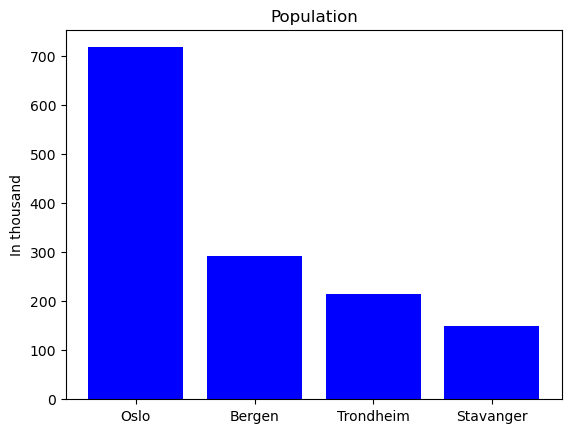

In [143]:
import matplotlib.pyplot as plt

# Define category labels
municipality = ["Oslo", "Bergen", "Trondheim", "Stavanger"]
# Population in thousand
population = np.array([717710, 291940, 214565, 149048]) / 1000

# Create bar chart
plt.bar(municipality, population, color="blue")

# Add overall title
plt.title("Population")
plt.ylabel("In thousand")

We use [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) to create _horizontal_ bars:


Text(0.5, 0, 'In thousand')

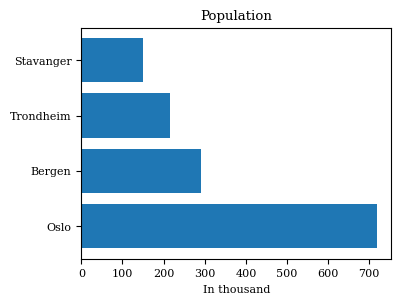

In [25]:
plt.barh(municipality, population)  # barh function creates a horizontal bar chart
plt.title("Population")
plt.xlabel("In thousand")

---

## Adding labels and annotations

Matplotlib has numerous functions to add labels and annotations:

- Use [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)
  and [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)
  to add titles.
  The latter adds a title for the whole figure, which might
  span multiple plots (axes).
- We can add axis labels by calling
  [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)
  and [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).
- To add a legend, call
  [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html), which in its most simple
  form takes a list of labels which are in the same order
  as the plotted data.
- Use [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)
  to add additional text at arbitrary locations.


Text(0.05, 0.05, 'Look Here!')

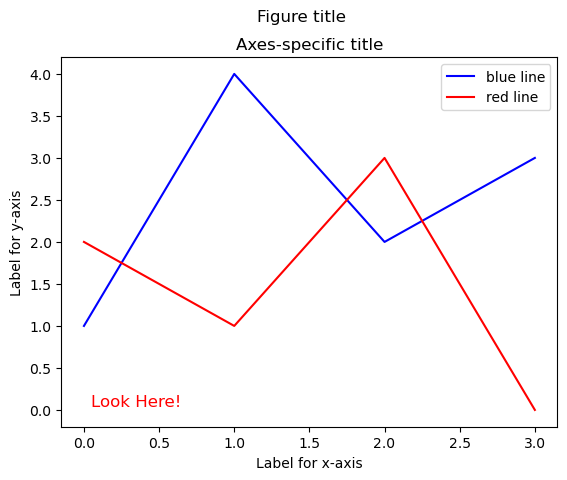

In [152]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, c="blue", label="blue line")
plt.plot(xvalues, yvalues2, c="red", label="red line")

# Add a title to the axes
plt.title("Axes-specific title")

# Add a subtitle to the figure
plt.suptitle("Figure title")

# Lable the x-axis and y-axis
plt.xlabel("Label for x-axis")
plt.ylabel("Label for y-axis")

# Add a legend
plt.legend(loc="upper right")

# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, "Look Here!", fontsize=12, color="red")

---

## Plot limits, ticks and tick labels

We adjust the plot limits, ticks and tick labels as follows:

- Plotting limits are set using the
  [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and
  [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) functions.
  Each accepts a tuple `(min,max)` to set the desired range.
- Ticks and tick labels can be set by calling
  [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)
  or [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html).


$\pi$


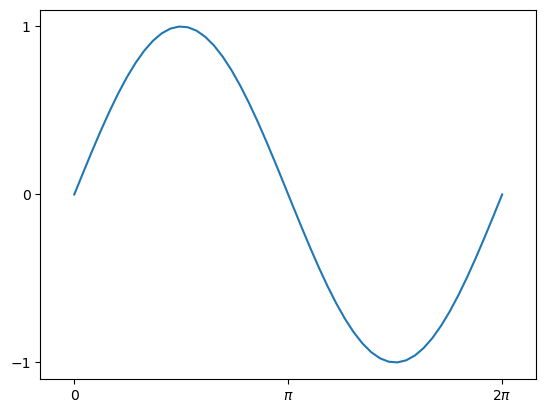

In [158]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(0.0, 2 * np.pi, 50)
yvalues = np.sin(xvalues)
plt.plot(xvalues, yvalues)


# Adjust plot limits in x and y direction
plt.xlim((-0.5, 2 * np.pi + 0.5))
plt.ylim((-1.1, 1.1))

# Set major ticks and labels for x-axis
# We can use LaTeX code in labels!
_ = plt.xticks(
    [0.0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"]
)  # Has to use the 'r' to indicate that it is a raw string
# Set major ticks for y-axis
_ = plt.yticks([-1.0, 0.0, 1.0])

---

## Adding straight lines

Quite often, we want to add horizontal or vertical lines to highlight a particular value. We can do this using the following functions:

- [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) adds a _horizontal_ line at a given $y$-value.
- [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) adds a _vertical_ line at a given $x$-value.
- [`axline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline) adds a line defined by two points or by a single point and a slope.


_Example: Adding horizontal and vertical lines_

Consider the sine function from above. We can add a horizontal line at 0 and two vertical lines at the points where the function attains its minimum and maximum as follows:


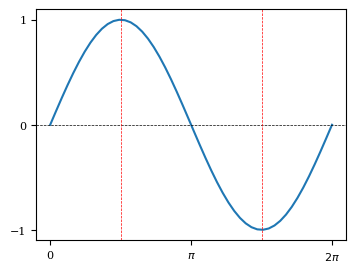

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Plot sine function (same as above)
xvalues = np.linspace(0.0, 2 * np.pi, 50)
plt.plot(xvalues, np.sin(xvalues))

# Set major ticks and labels for x-axis
plt.xticks([0.0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
# Set major ticks for y-axis
plt.yticks([-1.0, 0.0, 1.0])

# Add black dashed horizontal line at y-value 0
plt.axhline(0.0, lw=0.5, ls="--", c="black")

# Add red dashed vertical lines at maximum / minimum points
plt.axvline(0.5 * np.pi, lw=0.5, ls="--", c="red")
plt.axvline(1.5 * np.pi, lw=0.5, ls="--", c="red")

---

## Object-oriented interface

So far, we have only used the so-called `pyplot` interface which involves
calling _global_ plotting functions from `matplotlib.pyplot`.
This interface is intended to be similar to Matlab, but is also somewhat
limited and less clean.

We can instead use the object-oriented interface
(called this way because we call methods of the
[`Figure`](https://matplotlib.org/stable/api/figure_api.html) and
[`Axes`](https://matplotlib.org/stable/api/axes_api.html) objects).
While there is not much point in using the object-oriented interface
in a Jupyter notebook when we want to create a single graph, it should be the preferred method when
writing re-usable code in Python files or when creating a figure with multiple subplots.

To use the object-oriented interface, we need to get figure and
axes objects. The easiest way to accomplish this is using
the [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function, like this:

```python
fig, ax = plt.subplots()
```

We then use methods of the `Axes` object returned by `subplots()` instead of the
functions we have used so for. For example, instead of
[`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html),
we use the [`Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)
method.

As an example, we recreate the graph from the section on
labels and annotations using the object-oriented interface:


Text(0.05, 0.05, 'More text')

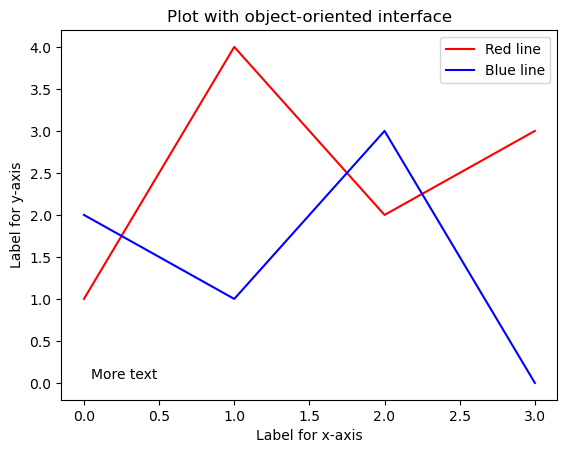

In [159]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

fig, ax = plt.subplots()
ax.plot(xvalues, yvalues, color="red", label="Red line")
ax.plot(xvalues, yvalues2, color="blue", label="Blue line")
ax.set_xlabel("Label for x-axis")
ax.set_ylabel("Label for y-axis")
ax.legend()
ax.set_title("Plot with object-oriented interface")
ax.text(0.05, 0.05, "More text")

The code is quite similar to the previous section, except that attributes are set using
the `set_xxx()` methods of the `ax` object. For example,
instead of calling `xlim()`, we use
[`ax.set_xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).


<div class="alert alert-info">
<h3> Your turn</h3>

Recall the example from above in which we drew from a normal distribution and visualized the sample using a histogram.

<ol>
    <li>Repeat these steps, but create the histogram using the object-oriented Matplotlib interface.</li>
    <li>Set the x-axis label to 'Realized random number' and the y-axis label to 'Bin size'.</li>
    <li>Add the title 'Histogram of normal draws'.</li>
<ol>

</div>


---

## Working with multiple plots (axes)

The object-oriented interface becomes particularly useful
if we want to create multiple axes (or figures). This can also be achieved
using the `pyplot` programming model but is somewhat more obscure.

For example, to create a row with two subplots, we use:


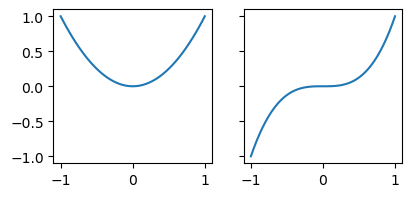

In [163]:
import matplotlib.pyplot as plt

# Create one figure with 2 axes objects, arranged as two columns in a single row
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.0), sharey=True)

# X values
xvalues = np.linspace(-1, 1, 50)

# Plot x^2 in the first axes
axes[0].plot(xvalues, xvalues**2, label="x^2")

# Plot x^3 in the second axes
axes[1].plot(xvalues, xvalues**3, label="x^3")

With multiple axes objects in a single figure (as in the above example), the `ax` returned
by `subplots()` is a NumPy array. Its elements
map to the individual panels within the figure in a natural way.

We can visualize this mapping for the case of a single row
and two columns as follows:


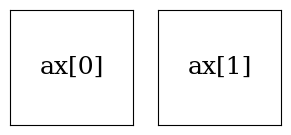

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(3.5, 1.5))

for i, ax in enumerate(axes):
    # Turn off ticks of both axes
    ax.set_xticks(())
    ax.set_yticks(())
    # Label axes object
    text = f"ax[{i}]"
    ax.text(0.5, 0.5, text, va="center", ha="center", fontsize=18)

Don't worry about the details of how this graph is generated, the only take-away here is
how axes objects are mapped to the panels in the figure.

If we request panels in two dimensions, the `ax` object will be a 2-dimensional
array, and the mapping of axes objects to panels will look like this instead:


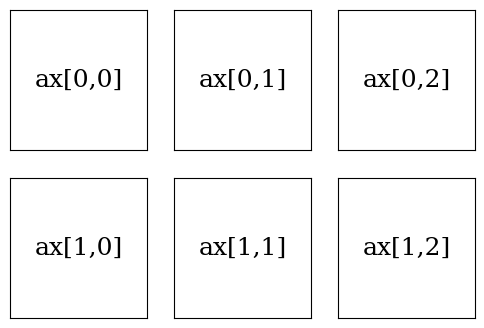

In [32]:
# Request figure with 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(6, 4))

for i, axrow in enumerate(axes):
    for j, ax in enumerate(axrow):
        # Turn off ticks of both axes
        ax.set_xticks(())
        ax.set_yticks(())
        # Label axes object
        text = f"ax[{i},{j}]"
        ax.text(0.5, 0.5, text, va="center", ha="center", fontsize=18)

_Example: Create a plot with 2 panels_

We can use the elements of `ax` to plot into individual panels:


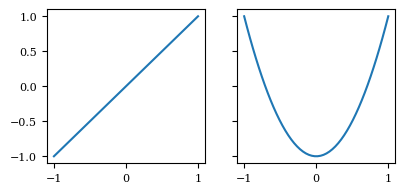

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(4.5, 2.0))
xvalues = np.linspace(-1.0, 1.0, 50)

# Plot into first column
axes[0].plot(xvalues, xvalues)

# Plot into second column
axes[1].plot(xvalues, 2 * xvalues**2.0 - 1)

_Example: Create a figure with 2 rows and 2 columns_


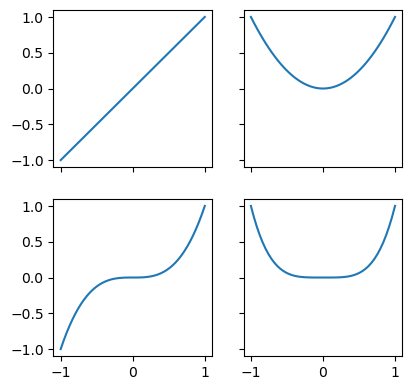

In [165]:
# create figure with 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(4.5, 4.5))

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot the first four powers of x
exponent = 1
for i in range(2):
    for j in range(2):
        yvalues = xvalues**exponent
        axes[i, j].plot(xvalues, yvalues)
        # Increment exponent for next subplot
        exponent += 1

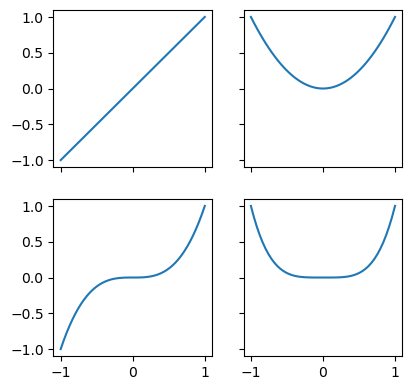

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(4.5, 4.5))

nrow, ncol = axes.shape

exponent = 1

for i in range(nrow):
    for j in range(ncol):
        ax = axes[i, j]
        yvalues = xvalues**exponent
        ax.plot(xvalues, yvalues)  # Specify the axes object instead of using plt.plot()

        exponent += 1

Note the use of `sharex=True` and `sharey=True`. This tells
Matplotlib that all axes share the same plot limits, so the
tick labels can be omitted in the figure's interior to
preserve space.


<div class="alert alert-info">
<h3> Your turn</h3>
Create a figure with 3 columns (on a single row) and plot the following functions
on the interval [0, 6]:
<ol>
    <li>Subplot 1: <i>y = sin(x)</i></li>
    <li>Subplot 2: <i>y = sin(2*x)</i></li>
    <li>Subplot 3: <i>y = sin(4*x)</i></li>
</ol>

<i>Hint:</i> The sine function can be imported from NumPy as <TT>np.sin()</T>.

</div>


---

## Plotting with pandas

Pandas is a library to process and analyze data in Python. We cover pandas later in the course, but this section summarizes how plotting can be done directly with pandas. You can skip it until we have introduced pandas.

Pandas does not implement its own graphics library, but provides convenient wrappers around Matplotlib functions that can be used to quickly visualize data stored in DataFrames. Alternatively, we can extract the numerical data and pass it to Matplotlib's routines manually.


### Bar charts

Let's return to our municipality population data.
To plot population numbers as a bar chart, we can directly use pandas's
[`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html):


<Axes: xlabel='Municipality'>

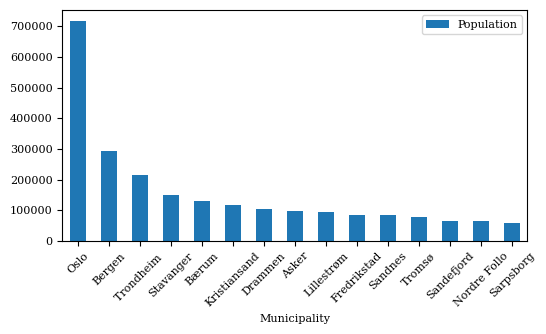

In [35]:
import pandas as pd

# Path to local data/ folder
DATA_PATH = "../../data"

# Path to population data
filepath = f"{DATA_PATH}/population_norway.csv"

# Read in population data for Norwegian municipalities
df = pd.read_csv(filepath)

# Keep only the first 15 observations
df = df.iloc[:15]

# Create bar chart, specify figure size, rotate x-axis tick labels by 45 degrees
df.plot.bar(x="Municipality", y="Population", rot=45, figsize=(6, 3))

Alternatively, we can construct the graph ourselves using Matplotlib:


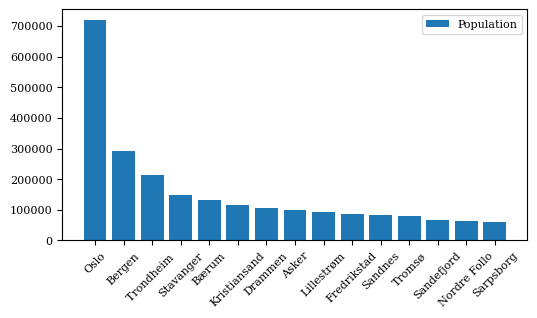

In [36]:
import matplotlib.pyplot as plt

# Extract municipality names
labels = df["Municipality"]

# Extract population numbers
values = df["Population"]

# Create new figure with desired size
plt.figure(figsize=(6, 3))

# Create bar chart
plt.bar(labels, values)

# Add legend
plt.legend(["Population"])

# Rotate tick labels by 45 degrees
plt.tick_params(axis="x", labelrotation=45)

Matplotlib's functions usually directly work with pandas's data structures,
In cases where they don't, we can convert a `DataFrame` or `Series` object
to a NumPy array using the
[`to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)
method.


---

### Plotting time series data

To plot time series data, we can use the
[`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
method which optionally accepts arguments to specify which columns
should be used for the $x$-axis and which for the $y$-axis. We illustrate
this using the US unemployment rate at annual frequency.


<Axes: xlabel='Year', ylabel='Unemployment rate (%)'>

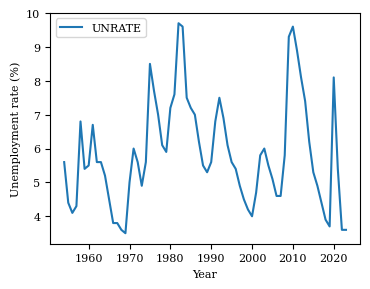

In [37]:
import numpy as np
import pandas as pd

# Path to annual FRED data; DATA_PATH variable was defined above!
filepath = f"{DATA_PATH}/FRED/FRED_annual.csv"

# Read CSV data
df = pd.read_csv(filepath, sep=",")

# Plot unemployment rate by year
df.plot(x="Year", y="UNRATE", ylabel="Unemployment rate (%)")

---

### Scatter plots

Using the [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) method,
we can generate scatter plots, plotting one column
against another. To illustrate, we plot the US unemployment rate against
inflation in any given year over the post-war period.

Note that you can pass additional arguments to pandas's version of `scatter()` which are passed on to Matplotlib's
[`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html), for example `edgecolors`.


<Axes: xlabel='Unemployment rate (%)', ylabel='Inflation (%)'>

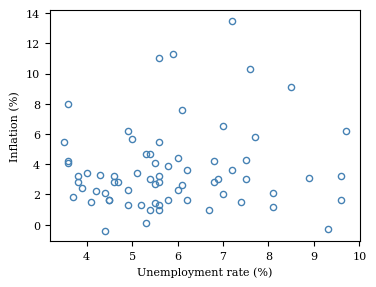

In [38]:
# Path to annual FRED data; DATA_PATH variable was defined above!
filepath = f"{DATA_PATH}/FRED/FRED_annual.csv"

# Read CSV data
df = pd.read_csv(filepath, sep=",")

df.plot.scatter(
    x="UNRATE",  # plot unemployment rate on x-axis
    y="INFLATION",  # plot inflation rate on y-axis
    color="none",
    edgecolors="steelblue",
    xlabel="Unemployment rate (%)",
    ylabel="Inflation (%)",
)

Pandas also offers the convenience function
[`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)
which lets us easily create pairwise scatter plots for more than two variables:


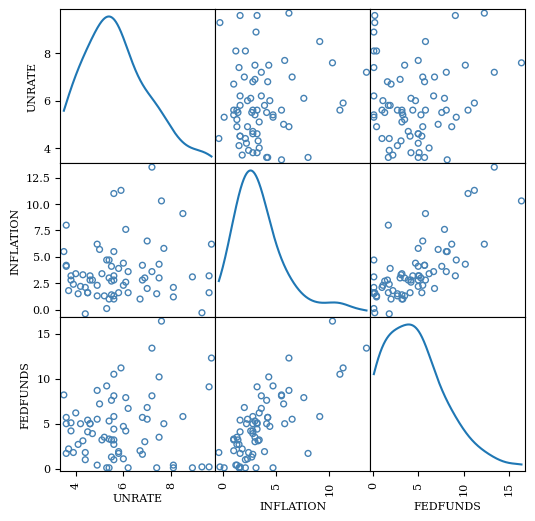

In [39]:
from pandas.plotting import scatter_matrix

# Columns to include in plot
columns = ["UNRATE", "INFLATION", "FEDFUNDS"]

# Use argument diagonal='kde' to plot kernel density estimate
# in diagonal panels
ax = scatter_matrix(
    df[columns],
    figsize=(6, 6),
    diagonal="kde",  # plot kernel density along diagonal
    s=70,  # marker size
    color="none",
    edgecolors="steelblue",
    alpha=1.0,
)

---

### Box plots

To quickly plot some descriptive statistics, we can use the
[`DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
provided by pandas. This plot shows the median, the interquartile range (25th to 75th percentile)
and the outliers of some underlying data.

We demonstrate this by plotting the distribution
of the unemployment rate, inflation and the Federal Funds Rate in the US:


<Axes: ylabel='Relative change in % (annual)'>

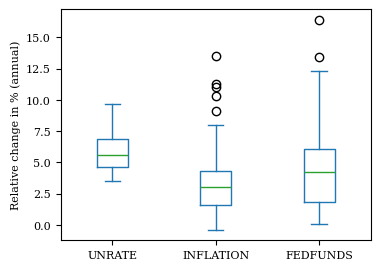

In [40]:
import numpy as np
import pandas as pd

# Path to annual FRED data; DATA_PATH variable was defined above!
filepath = f"{DATA_PATH}/FRED/FRED_annual.csv"

# Read CSV data
df = pd.read_csv(filepath, sep=",")

# Include only the following columns in plot
columns = ["UNRATE", "INFLATION", "FEDFUNDS"]

# Create box plot. Alternatively, use df.plot(kind='box')
df[columns].plot.box(ylabel="Relative change in % (annual)")

---

## Optional exercises


### Exercise 1: Trigonometric functions

Plot the functions $\sin(x)$ and $\cos(x)$ on the interval
$[-\pi, \pi]$, each in a separate graph.
Include a legend for each plot, and add pretty tick
labels at $[-\pi, 0, \pi]$ which use the $\LaTeX$ symbol for $\pi$.
Add an overall title "Trigonometric functions".

_Hint:_ NumPy defines the functions
[`np.sin()`](https://numpy.org/doc/stable/reference/generated/numpy.cos.html) and
[`np.cos()`](https://numpy.org/doc/stable/reference/generated/numpy.cos.html) as well
as the value [`np.pi`](https://numpy.org/doc/stable/reference/constants.html#numpy.pi).


### Exercise 2: Histograms for increasing sample sizes

In this exercise, we plot histograms against the actual PDF of a [standard-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distributed
random variable for increasing sample sizes.

Consider the standard-t distribution with 20 degrees of freedom (this is the only
parameter of this distribution):

- To draw samples from this distribution, use NumPy RNG's [`standard_t()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html) method.
- To plot the PDF of this distribution, use the [`t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) distribution from
  `scipy.stats`. You can import it as follows

  ```python
  from scipy.stats import t as standard_t
  ```

  It is a good idea to assign more descriptive names to imported symbols
  than a `t`.

Perform the following tasks:

1.  Draw random samples from the standard-t distribution for
    a sequence of increasing sample sizes of 50, 100, 500, 1000, 5000 and 10000.
2.  Create a single figure with 6 panels in which you plot a histogram
    of the samples you have drawn. Use matplotlib's
    [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function
    to do this, and pass the argument `bins = 50` so that each panel
    uses the same number of bins.
3.  Add the actual PDF of the standard-t distribution to each panel.
    To evaluate the PDF, use the `pdf()` method of the `t` distribution you
    imported from `scipy.stats`, see
    [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).


---

## Solutions

### Solution for exercise 1


Text(0.5, 0.98, 'Trigonometric functions')

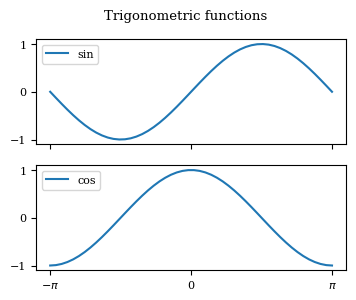

In [41]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-np.pi, np.pi, 50)
# Create figure with two rows, one column
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True)

xticks = [-np.pi, 0.0, np.pi]
# Tick labels use LaTeX notation for pi, which is \pi and has to be
# surrounded by $$.
xticklabels = [r"$-\pi$", "0", r"$\pi$"]
yticks = [-1.0, 0.0, 1.0]

# Create sin() plot using first axes object
ax[0].plot(xvalues, np.sin(xvalues), label="sin")
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticklabels)
ax[0].set_yticks(yticks)
ax[0].legend(loc="upper left")

# Create cos() plot using second axes object
ax[1].plot(xvalues, np.cos(xvalues), label="cos")
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticklabels)
ax[1].set_yticks(yticks)
ax[1].legend(loc="upper left")

# Add overall figure title (this is not axes-specific)
fig.suptitle("Trigonometric functions")

### Solution for exercise 2

In the following solution, we create a figure with six panels (axes) and
iterate over these axes. In each iteration, we

1.  draw a random sample for the given (increasing) size;
2.  plot the histogram using the current axes object; and
3.  overlay the actual PDF.


Text(0.5, 1.05, 'Draws from the standard-t distribution')

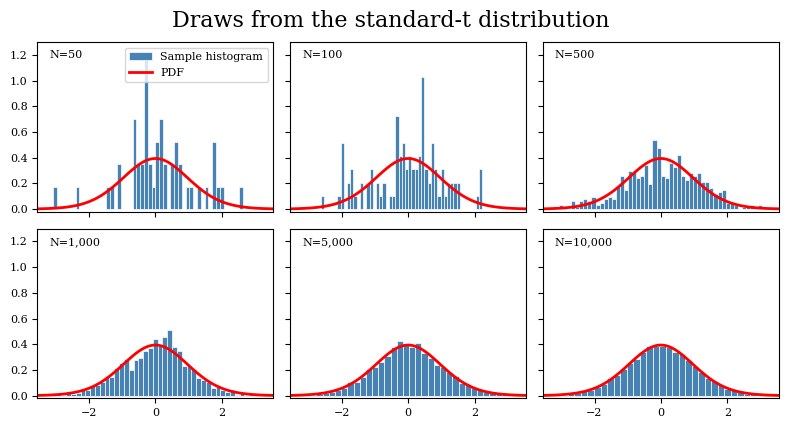

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from scipy.stats import t as standard_t

# Sample sizes
Nobs = np.array((50, 100, 500, 1000, 5000, 10000))

# degrees of freedom
df = 20

# Determine xlims such that we cover the (0.1, 99.9) percentiles
# of the distribution.
xmin, xmax = standard_t.ppf((0.001, 0.999), df=df)

xvalues = np.linspace(xmin, xmax, 100)
pdf = standard_t.pdf(xvalues, df=df)

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 4))

# initialize default RNG
rng = default_rng(123)

for i, ax in enumerate(ax.flatten()):
    # Sample size to be plotted in current panel
    N = Nobs[i]
    # Draw sample of size N
    data = rng.standard_t(df=df, size=N)

    # plot histogram of given sample
    ax.hist(
        data,
        bins=50,
        linewidth=0.5,
        edgecolor="white",
        color="steelblue",
        density=True,
        label="Sample histogram",
    )

    # overlay actual PDF
    ax.plot(xvalues, pdf, color="red", lw=2.0, label="PDF")

    # create text with current sample size
    ax.text(0.05, 0.95, f"N={N:,d}", transform=ax.transAxes, va="top")

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((-0.02, 1.3))

    # plot legend only for the first panel
    if i == 0:
        ax.legend(loc="upper right")

# compress space between individual panels
fig.tight_layout()
# Add overall title
fig.suptitle("Draws from the standard-t distribution", fontsize=16, y=1.05)